# Fires in the City of Pittsburgh

Jason Xie – 9 April 2024

***

This notebook examines the number of fires (of any type) in Pittsburgh with consideration of how many people live in that neighborhood. Datasets used may be found [here for fires](https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh), [here for population](https://data.wprdc.org/dataset/2020-census-redistricting-data-extracts), and [here for neighborhoods](https://data.wprdc.org/dataset/neighborhoods2).

## Setup

### Neighborhood names

There are 90 neighborhoods in Pittsburgh. As some datasets have different names for the same neighborhood, the following list will be the names they’re normalized to.

- Allegheny Center
- Allegheny West
- Allentown
- Arlington
- Arlington Heights
- Banksville
- Bedford Dwellings
- Beechview
- Beltzhoover
- Bloomfield
- Bluff
- Bon Air
- Brighton Heights
- Brookline
- California-Kirkbride
- Carrick
- Central Business District
- Central Lawrenceville
- Central Northside
- Central Oakland
- Chartiers City
- Chateau
- Crafton Heights
- Crawford-Roberts
- Duquesne Heights
- East Allegheny
- East Carnegie
- East Hills
- East Liberty
- Elliott
- Esplen
- Fairywood
- Fineview
- Friendship
- Garfield
- Glen Hazel
- Greenfield
- Hays
- Hazelwood
- Highland Park
- Homewood North
- Homewood South
- Homewood West
- Knoxville
- Larimer
- Lincoln Place
- Lincoln-Lemington-Belmar
- Lower Lawrenceville
- Manchester
- Marshall-Shadeland
- Middle Hill
- Morningside
- Mount Washington
- Mt. Oliver
- New Homestead
- North Oakland
- North Shore
- Northview Heights
- Oakwood
- Overbrook
- Perry North
- Perry South
- Point Breeze
- Point Breeze North
- Polish Hill
- Regent Square
- Ridgemont
- Shadyside
- Sheraden
- South Oakland
- South Shore
- South Side Flats
- South Side Slopes
- Spring Garden
- Spring Hill-City View
- Squirrel Hill North
- Squirrel Hill South
- St. Clair
- Stanton Heights
- Strip District
- Summer Hill
- Swisshelm Park
- Terrace Village
- Troy Hill
- Upper Hill
- Upper Lawrenceville
- West End
- West Oakland
- Westwood
- Windgap

### Import necessary modules and make configs

In [1]:
import pandas as pd
import geopandas
%matplotlib inline
pd.set_option('display.max_rows', 100)

## Fire incidents by neighborhood

We’ll first look at the raw numbers of how many fires occured in each neighborhood. Here, we take a look at the data.

In [2]:
fires = pd.read_csv('Datasets/Fire Incidents.csv')
fires.head(5)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


Now, let’s find out how many fires occured in each neighborhood.

In [23]:
fires_by_hood = fires.groupby('neighborhood').size()
fires_by_hood.name = 'Fires by Neighborhood'
fires_by_hood.index.name = 'neighborhood'
fires_by_hood

neighborhood
Allegheny Center              62
Allegheny West                43
Allentown                    127
Arlington                     51
Arlington Heights             13
Banksville                    59
Bedford Dwellings             45
Beechview                    148
Beltzhoover                  129
Bloomfield                   176
Bluff                        144
Bon Air                       22
Brighton Heights             154
Brookline                    195
California-Kirkbride          41
Carrick                      289
Central Business District    274
Central Lawrenceville         77
Central Northside            131
Central Oakland               94
Chartiers City                17
Chateau                       41
Crafton Heights               84
Crawford-Roberts             109
Duquesne Heights              40
East Allegheny               134
East Carnegie                 11
East Hills                   156
East Liberty                 208
Elliott                       

This list includes Mount Oliver Borough, which is not part of Pittsburgh. So, let’s remove it.

In [24]:
fires_by_hood = fires_by_hood.drop('Mount Oliver Borough')
fires_by_hood

neighborhood
Allegheny Center              62
Allegheny West                43
Allentown                    127
Arlington                     51
Arlington Heights             13
Banksville                    59
Bedford Dwellings             45
Beechview                    148
Beltzhoover                  129
Bloomfield                   176
Bluff                        144
Bon Air                       22
Brighton Heights             154
Brookline                    195
California-Kirkbride          41
Carrick                      289
Central Business District    274
Central Lawrenceville         77
Central Northside            131
Central Oakland               94
Chartiers City                17
Chateau                       41
Crafton Heights               84
Crawford-Roberts             109
Duquesne Heights              40
East Allegheny               134
East Carnegie                 11
East Hills                   156
East Liberty                 208
Elliott                       

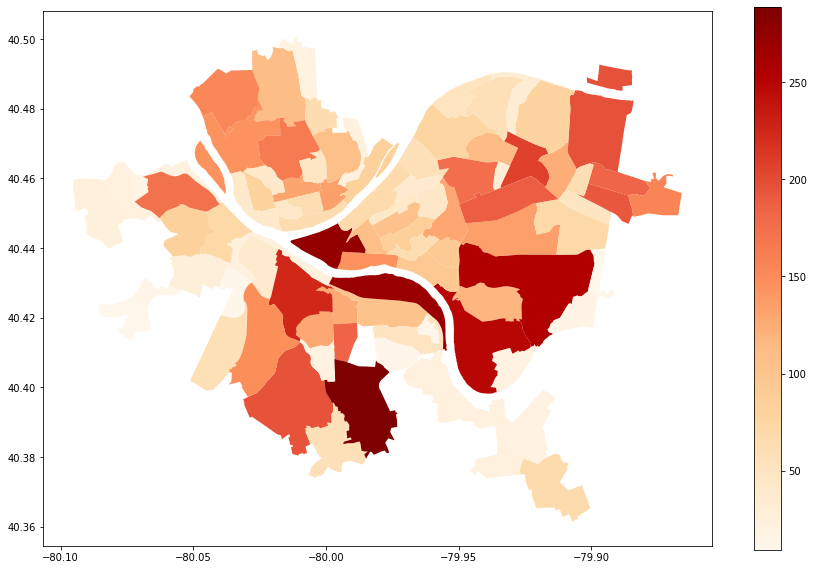

In [25]:
neighborhoods = geopandas.read_file('Neighborhoods/Neighborhoods_.shp')
fire_map = neighborhoods.merge(fires_by_hood.to_frame(), how='left', left_on='hood', right_on='neighborhood')
fire_map.plot(column='Fires by Neighborhood', legend=True, figsize=(15,10), cmap='OrRd', missing_kwds={'color': 'lightgrey'})

## Population of neighborhoods

In [86]:
population = pd.read_csv('Datasets/Population by Neighborhood.csv').groupby('Neighborhood').sum()['2020_Total_Population']
population

Neighborhood
Allegheny Center                             1419
Allegheny West                                540
Allentown                                    2305
Arlington - Arlington Heights (Combined)     2040
Banksville                                   4127
Bedford Dwellings                            1386
Beechview                                    7596
Beltzhoover                                  1604
Bloomfield                                   8665
Bluff                                        5882
Bon Air                                       759
Brighton Heights                             7105
Brookline                                   13063
California-Kirkbride                          709
Carrick                                     10290
Central Business District (Downtown)         5477
Central Lawrenceville                        4720
Central Northside                            2972
Central Oakland                              5835
Chartiers City                       

Unfortunately, there are a few differences with the neighborhood names, so let’s change those.

In [87]:
population = population.rename(index={'Central Business District (Downtown)':'Central Business District'})
population = population.rename(index={'Spring Hill-City':'Spring Hill-City View'})
population

Neighborhood
Allegheny Center                             1419
Allegheny West                                540
Allentown                                    2305
Arlington - Arlington Heights (Combined)     2040
Banksville                                   4127
Bedford Dwellings                            1386
Beechview                                    7596
Beltzhoover                                  1604
Bloomfield                                   8665
Bluff                                        5882
Bon Air                                       759
Brighton Heights                             7105
Brookline                                   13063
California-Kirkbride                          709
Carrick                                     10290
Central Business District                    5477
Central Lawrenceville                        4720
Central Northside                            2972
Central Oakland                              5835
Chartiers City                       

The final issue is that the population data combines Arlington and Arlington Heights. Let’s fix that.

(Note: Data for Arlington and Arlington Heights are from 2010, while the other neighborhood population data is from 2020.)

In [88]:
population = population.drop('Arlington - Arlington Heights (Combined)')
population = pd.concat([population, pd.Series({'Arlington': 1869, 'Arlington Heights': 244})])
population.name = 'Population by Neighborhood'
population.index.name = 'neighborhood'
population = population.sort_index()
population

neighborhood
Allegheny Center              1419
Allegheny West                 540
Allentown                     2305
Arlington                     1869
Arlington Heights              244
Banksville                    4127
Bedford Dwellings             1386
Beechview                     7596
Beltzhoover                   1604
Bloomfield                    8665
Bluff                         5882
Bon Air                        759
Brighton Heights              7105
Brookline                    13063
California-Kirkbride           709
Carrick                      10290
Central Business District     5477
Central Lawrenceville         4720
Central Northside             2972
Central Oakland               5835
Chartiers City                 492
Chateau                         19
Crafton Heights               3999
Crawford-Roberts              2293
Duquesne Heights              2397
East Allegheny                1903
East Carnegie                  491
East Hills                    2892
East Li

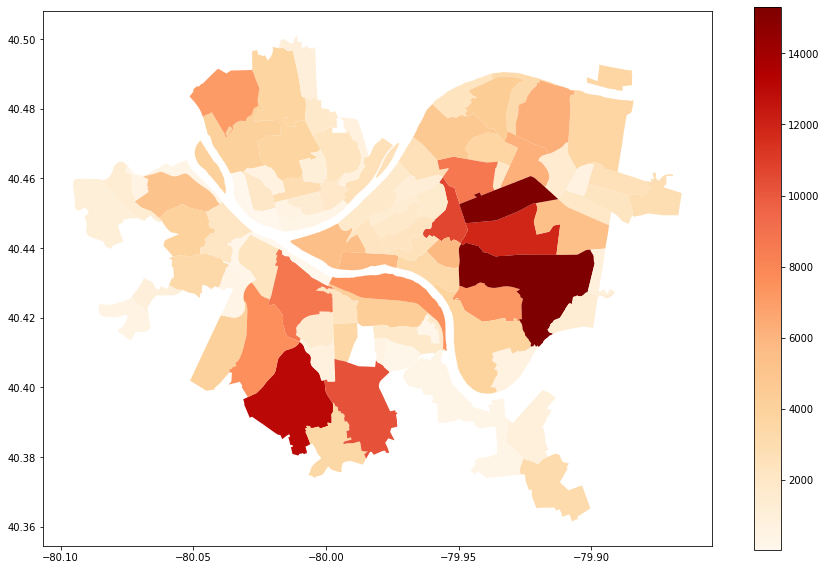

In [95]:
neighborhoods = geopandas.read_file('Neighborhoods/Neighborhoods_.shp')
population_map = neighborhoods.merge(population.to_frame(), how='left', left_on='hood', right_on='neighborhood')
population_map.plot(column='Population by Neighborhood', legend=True, figsize=(15,10), cmap='OrRd', missing_kwds={'color': 'lightgrey'})

## Fires per Capita

We cannot forget that different neighborhoods obviously have different populations. A large neighborhood would likely have more fires than a small one. So, we ultimately consider fires per capita as our measurement.

In [118]:
fires_per_people = fires_by_hood/population
fires_per_people.index.name = 'neighborhood'
fires_per_people.name = 'Fires per People by Neighborhood'
fires_per_people.index.name = 'neighborhood'
fires_per_people.sort_values()

neighborhood
Westwood                     0.008403
Regent Square                0.009269
Morningside                  0.009840
Squirrel Hill North          0.011365
Swisshelm Park               0.011949
North Oakland                0.012160
Shadyside                    0.012339
Highland Park                0.012510
Oakwood                      0.012683
Point Breeze                 0.013089
Stanton Heights              0.013101
Banksville                   0.014296
Brookline                    0.014928
Central Oakland              0.016110
Greenfield                   0.016251
Friendship                   0.016302
Central Lawrenceville        0.016314
Overbrook                    0.016652
Duquesne Heights             0.016688
Squirrel Hill South          0.016713
Windgap                      0.017113
Beechview                    0.019484
Bloomfield                   0.020312
Crafton Heights              0.021005
Summer Hill                  0.021042
Lincoln Place                0.021236

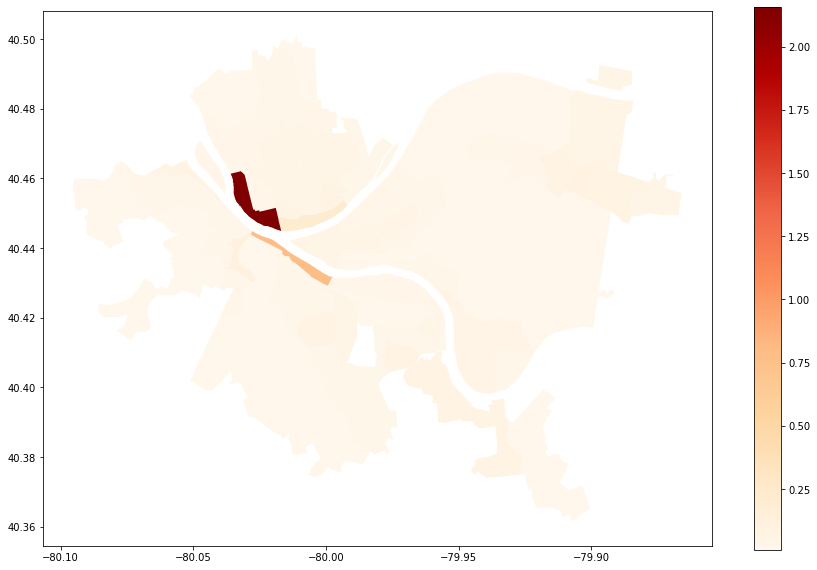

In [119]:
neighborhoods = geopandas.read_file('Neighborhoods/Neighborhoods_.shp')
fires_per_people_map = neighborhoods.merge(fires_per_people.to_frame(), how='left', left_on='hood', right_on='neighborhood')
fires_per_people_map.plot(column='Fires per People by Neighborhood', legend=True, figsize=(15,10), cmap='OrRd', missing_kwds={'color': 'lightgrey'})

Noting that because Chateau and Southside are basically uninhabited (mainly consisting of warehouses and industrial), fire rates per capita are extremely high. Thus, they will be omitted.

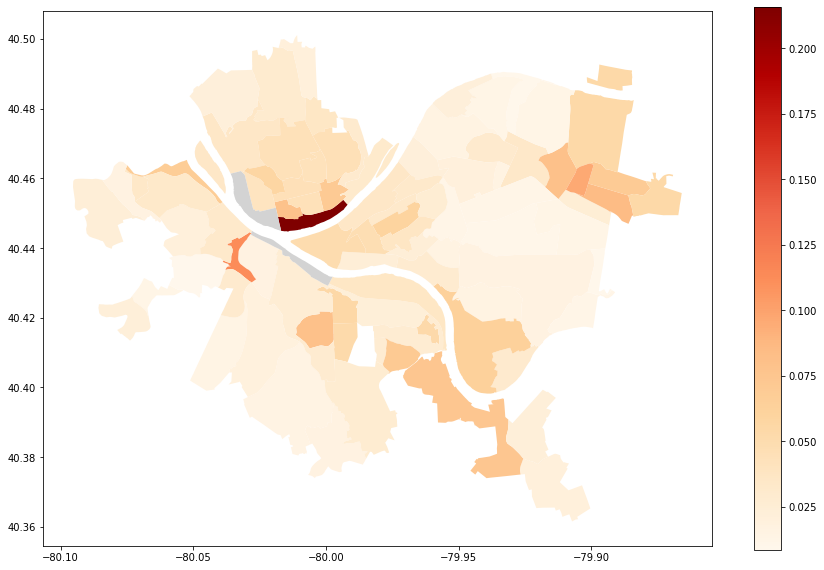

In [120]:
fires_per_people = fires_per_people.drop('South Shore')
fires_per_people = fires_per_people.drop('Chateau')
fires_per_people_map = neighborhoods.merge(fires_per_people.to_frame(), how='left', left_on='hood', right_on='neighborhood')
fires_per_people_map.plot(column='Fires per People by Neighborhood', legend=True, figsize=(15,10), cmap='OrRd', missing_kwds={'color': 'lightgrey'})

Let’s look at the data in a different form.

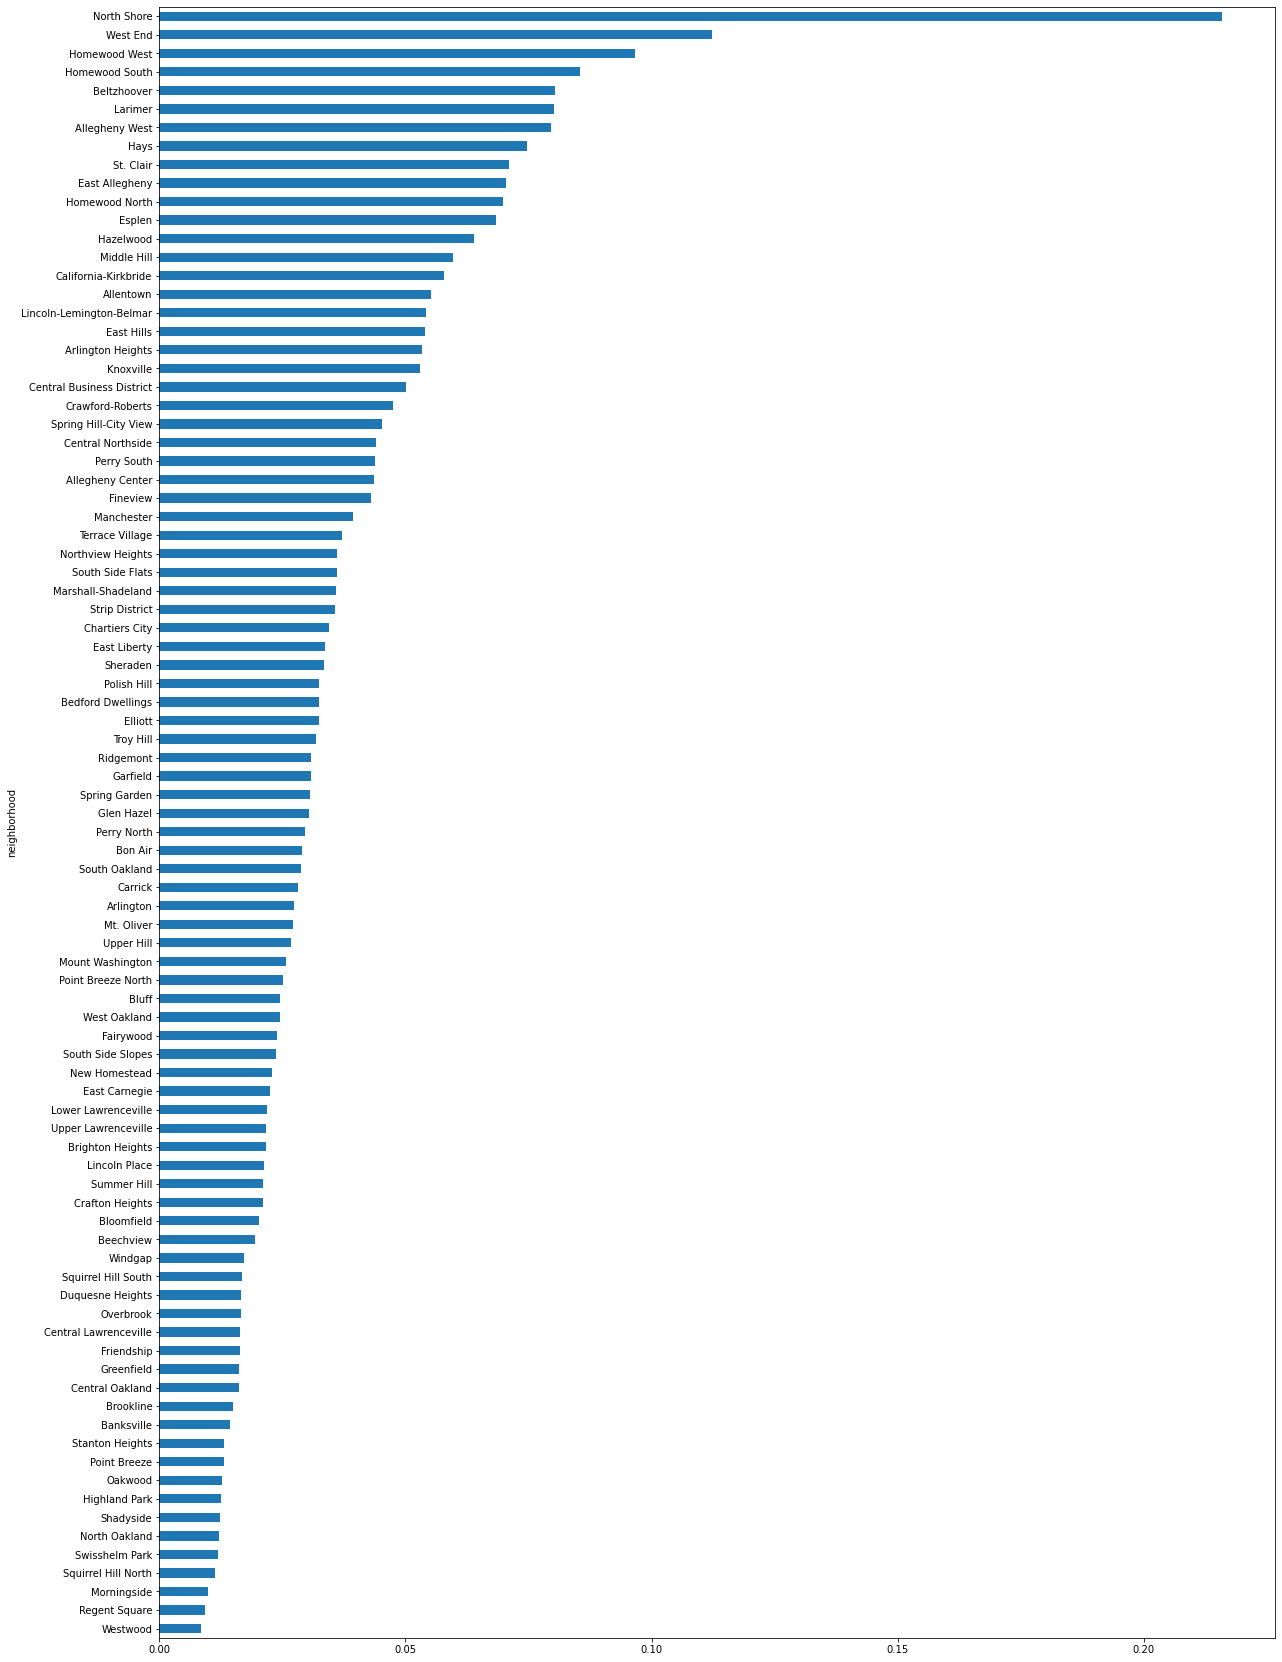

In [115]:
fires_per_people.sort_values().plot.barh(figsize=(20,30))

In [125]:
fires_per_people.sort_values(ascending=False).tail(5)

neighborhood
Swisshelm Park         0.011949
Squirrel Hill North    0.011365
Morningside            0.009840
Regent Square          0.009269
Westwood               0.008403
Name: Fires per People by Neighborhood, dtype: float64

## Conclusions

Thus, the neighborhoods with the least fires per capita are, in descending order:
- Swisshelm Park
- Squirrel Hill North
- Morningside
- Regent Square
- Westwood